In [1]:
import gym
import random
env=gym.make("Taxi-v2").env
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
env.render()
env.step(1)
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [33]:
import numpy as np

q_table=np.zeros((env.observation_space.n,env.action_space.n))

In [34]:
lr=0.1
gamma=0.6
epsilon=0.1


all_num_steps=[]
all_penalties=[]

num_iter=100000

for iter in range(num_iter):
    curr_state=env.reset()
    num_steps=0
    penalties=0
    done=False
    
    #Play until done
    while not done:
        
        #random sampling
        if(random.uniform(0,1) < epsilon):
            action = env.action_space.sample()
        #using the q table for action
        else:
            action = np.argmax(q_table[curr_state])
        
        next_state, reward, done, info = env.step(action)
        if reward == -10:
            penalties+=1
        num_steps+=1
        
        prev_qval=q_table[curr_state][action]
        #update Q table
        q_table[curr_state][action] = (1-lr)*prev_qval + lr*(reward + gamma*np.max(q_table[next_state]))
        
        curr_state=next_state
    if iter%500==0:
        all_num_steps.append(num_steps)
        all_penalties.append(penalties)
#     if iter%5000==0:
#         print(penalties)

114
1
0
1
0
0
1
0
0
0
2
1
0
0
0
2
0
0
1
0


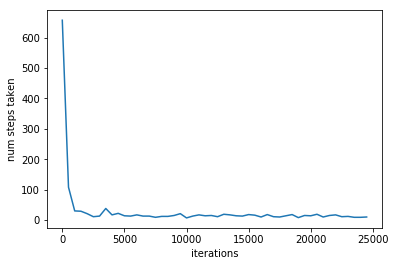

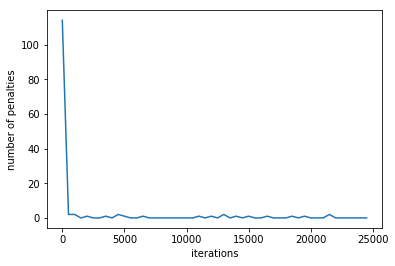

In [49]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(50))*500,all_num_steps[:50])
plt.ylabel('num steps taken')
plt.xlabel('iterations')
plt.show();

plt.plot(np.array(range(50))*500,all_penalties[:50])
plt.ylabel('number of penalties')
plt.xlabel('iterations')
plt.show();
